# Steady viscid and compressible/incompressible constrained optimisation at constant $C_{L}$ [1]

## 1. Introduction 

Before going through the following Jupyter Notebook, it is strongly advised to review the previous (base) case being drawn up. The scope of the this document shall be enlighten possible available options through the presentation of a different case. In particular, the case in question concerns the use of a different solver, as well as a different adjoint approach (constrained), whose effects are matematically noteworthy. This notebook is meant to be a presentation for the compressible RANS solver, as well as the constrained design.

Before continuing, it is also remarkable to assert that the possibility to use *DISCRETE_ADJOINT* mode is linked to the platform on which the adjoint itself shall be launched. Nonetheless, the commands to run on the command prompt do not change.

When performing unconstrained optimisation, daily structural and manufacturing issues do not come into being, thus resulting unfeasable. Besides, the optimisation algorithms are usually run with the purpose of optimizing the airfoil for a certain flight condition (generally cruise), therefore lift coefficient and pitching moment estimation are known, as well as the geometry thresholds. Imposing those constraints worsens the computational cost for such a desing procedure, as introducing constraints means having to evaluate the gradient of those functions with respect to the desing variables, implying that an extra adjoint equation shall be solved for each additional constraint being applied. 

The baseline geometry is a RAE2822, whereas the optimisation procedure involves the drag, which represents the objective function. The pitching moment and the thickness shall be the constraints, while the constant lift coefficient is indirectly taken into consideration through the *FIXED_CL_MODE* [2]. When the regime is compressible, the flow conditions are such that shock formation happens to occur on the suction side. In this case, the solver being employed is RANS, as it accounts for a finite Reynolds number. The latter consideration has some implications on the mesh structure (see [2]). Notwithstanding, the default mesh being provided with by SU2 coders has been utilised for simplicity and speed sake.

Having been run on 1 core, the duration amounts to **18 hours** overall, for a total of **20 iterations** and **46 gradient evaluations**. Because of that, it is profoundly advised to make use of multiple cores if possible.

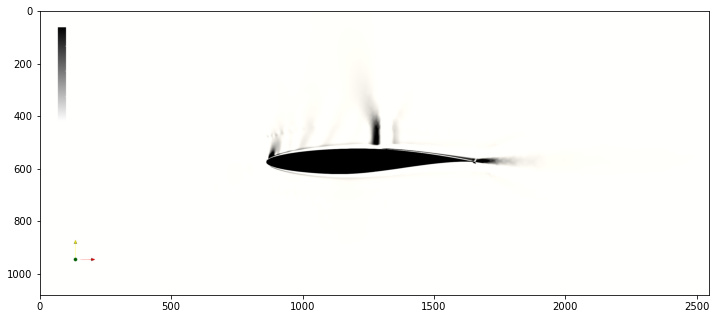

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax1=fig.add_subplot(2,1,2)
ax1.imshow(mpimg.imread('D:/SU2/Images/Shadowgraph_Init_Design_RAE2822.png'))


The above image illustrates a shadowgraph ($ \nabla \cdot \nabla \rho $) resulting from the density field which features the possibility to clearly visualise the shock formation along the suction side. This tecnique is usually employed for shock wave detection and is available on Paraview.

###############################################################################################################################

In [1]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_SOLVER.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ------------- DIRECT, ADJOINT, AND LINEARIZED PROBLEM DEFINITION ------------%
%
% Mathematical problem (DIRECT, CONTINUOUS_ADJOINT, DISCRETE ADJOINT)
MATH_PROBLEM= DIRECT
%
% Ph

Due to the high Reynolds number, the flow shall presumibly be turbulent over the entire airfoil, roughly. The latter considerations implicitly states that a transition model is not necessary to close the problem, as no laminar flow must be accounted on.

It is remarkable to observe that the configuration file might be employed to run the direct solver, solely, with the proper command line. If that is the case, the *RESTART_SOL* option must be disabled. The purpose of the same is running the simulation by starting from a .dat file (*solution_flow.dat*). In other words, if inabled, SU2 shall look for a restarting file from which it would continue the simulation, without overwriting the previous files, thus causing an error.


###############################################################################################################################

In [8]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_COMPRESSIBLE_SETUP.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Shape design of an RAE2822 (RANS)                          %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 5/15/2013                                                              %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% -------------------- COMPRESSIBLE FREE-STREAM DEFINITION --------------------%
%
% Mach number (non-dimensional, based on the free-stream values)
MACH_NUMBER= 0.8
%
% Angle of attack (deg

For a compressible viscous solver, the only objects necessary to initialise the problem are: flow direction (angle of incidence, Mach number, Reynolds number, characteristic length and freestream temperature, alongside a fluid model and a viscosity model, in this case *STANDARD_AIR* and *SUTHERLAND*, which require the definition of certain constants. |The initialisation procedure is shown hereafter:

1. Through the viscosity model and the temperature, the viscosity is calculated.
2. By assigning the gas model, and the temperature, it is possible to calculate the speed of sound.
3. The initial velocity is found thorugh the Mach.
4. From the Reybolds, viscosity and velocity, the initial density is known.
5. Subsequently, through the gas model, the initial pressure is known.

###############################################################################################################################

In [2]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_INCOMPRESSIBLE_SETUP.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% -------------------- INCOMPRESSIBLE FREE-STREAM DEFINITION ------------------%
%
% Density model within the incompressible flow solver.
% Options are CONSTANT (default), BOUSSINE

The above configuration section is executed by the executable if and only if the flow is incompressible.


###############################################################################################################################

In [4]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_UNSTEADY_SETUP.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% ------------------------- UNSTEADY SIMULATION -------------------------------%
%
TIME_DOMAIN = NO
%
% Unsteady simulation (NO, TIME_STEPPING, DUAL_TIME_STEPPING-1ST_ORDER,
%    

A small digression concerning the unsteadiness section. Being the current case assumed steady, the *TIME_DOMAIN* is set off. Notwithstanding, URANS are typically computed via dual time-stepping approach; the idea of dual time-stepping is that the current solution $u^{n}$ of the residual equation is computed for each time step by solving an ordinary differential equation in pseudo time $\tau$. The ODE solution is computed by a steady-state solver. Once a solution is aquired, the residual equation for the next physical time step $(n+1)$ is set up. As a result there are two time iterators. The inner (pseudo time) iterator and the outer (physical time) iterator. The number of iterations for the pseudo time iterator is specified by *INNER_ITER* and the number of iterations for the physical time iterator by *TIME_ITER*. Often, the *TIME_STEP* is a function of the dominant frequency of the flow which might be unknown. The *WINDOWN_FUNCTION* is set up because, in unsteady simulations, instantaneous values are not meaningful (due to the peculiar periodicity), therefore requiring for time-averaged quantities. *WINDOW_START_ITERATION* allows the user to cut the transient phase off the temporal signal in order for the mean to be spoiled. Time-averaged quantities are also useful for convergence criteria [3].

###############################################################################################################################

In [5]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_MARKERS.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ----------------- COMPRESSIBLE FLOW BOUNDARY CONDITIONS DEFINITION -----------%
%
% Navier-Stokes wall boundary marker(s) (NONE = no marker)
MARKER_HEATFLUX= ( AIRFOIL , 0.0)
%
%

For compressible solvers, it is advisible to merge any surface into one (*MARKER_FAR*) and assign the quantities presented in the above section. Adiabatic wall condition has been assigned on the airfoil. 

The surface identification section concerns the surfaces on which all the functional shall be evaluated. Besides in *MARKER_DESIGNING*, the surface for the optimisation problem is assigned.

###############################################################################################################################

In [6]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_NUMERICAL_METHOD.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ------------- COMMON PARAMETERS DEFINING THE NUMERICAL METHOD ---------------%
%
% Numerical method for spatial gradients (GREEN_GAUSS, WEIGHTED_LEAST_SQUARES)
NUM_METHOD_GRAD= W

It is strongly advised to not edit *NUM_METHOD_GRAD*, *RK_ALPHA_COEFF*, *LINEAR_SOLVER*. 

* **CFL_NUMBER**: might be considered as a trade-off between the simulation's stability and speed. Generally it is advisible to keep the CFL as much low as possible, albeit steady solvers help in increasing the CFL.
* **CFL_ADAPT/CFL_ADAPT_PARAM**: when *CFL_ADAPT* is true, it is possible to manage the CFL automatically as the number of iterations increase. Furthermore, SU2 is able to set off the CFL back when the liner solver is diverging. When the simulation is thoroughly converging, increasing the CFL raising the convergence rate, thus accelerating convergence.
* **OBJECTIVE_FUNCTION**: Already discussed in [2].
* **CUSTOM_OBJFUNC**: This interesting feature permits the user to define their personal objective function by using simple mathematical functions, setting the proper BCs.

###############################################################################################################################

In [7]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_NUMERICAL_METHOD_DEFINITION.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% -------------------- FLOW NUMERICAL METHOD DEFINITION -----------------------%
%
% Convective numerical method (JST, LAX-FRIEDRICH, CUSP, ROE, AUSM, HLLC,
%                     

The turbulence model introduces extra equations, which require a numerical scheme. The *ADJOINT-FLOW NUMERICAL METHOD DEFINITION* section has already been treated in the previous document. It is hereby recalled that changing the numerical scheme implies having to modify or introduce new lines/coefficients. It is adviced to only edit the coefficients related to the adjoint section.

###############################################################################################################################

The convergence criteria available on SU2, as well as the input/output section has already been discussed in [2]. As stated beforehand, the unsteadiness might be utilised to set a similar convergence criteria based on the time mean. 

In [1]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_TIMEAVERAGED_CONVERGENCE.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% --------------------------- CONVERGENCE PARAMETERS --------------------------%
%
% Time-averaged quantities based convergence criterium (ONLY for UNSTEADY flows).
% Activate the

When resolving for the period-averaged quantities, SU2 cannot generally be provided with the exact period, as it being evaluated numerically or being approximated with coarse time discretisation. Ergo, SU2 averages on a finite time span M, which last a few periods, and hopes for convergence to the period averaged quantity. Besides, windowing the signal has been proven to be decisive for the software to converge faster. Similarily to what the Cauchy criterium does for steady simulation, the same might be applied on the average quantity desired. The Cauchy-criterion is applied to the windowed time-averaged signal from the iteration specified by *WINDOW_START_ITER + CONV_WINDOW_STARTITER* up to the current iteration. The field or the list of fields to be monitored can be specified by *CONV_WINDOW_FIELD*.
The solver will stop if the average over a certain number of elements (set with *CONV_WINDOW_CAUCHY_ELEMS*) is smaller than the value set with *CONV_WINDOW_CAUCHY_EPS*. If a list of multiple convergence fields is chosen (as in the above example), the solver shall be said to have converged if the Cauchy criterium is satisfied for all the fields in the list. Ulterior mathematical details can be found on the SU2 site [3].

###############################################################################################################################

In [7]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_SHAPE_DESIGN_DEFINITION.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Unsteady/Steady Compressible/Incompressible optimization\CFD %       
% Author: Aldo Schioppa                                                        %
% Institution: ISAE-SUPAERO                                                    %
% Date: Aug, 2022                                                              %
% File Version 7.0.1 "Blackbird" (or newer)                                    %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% --------------------- OPTIMAL SHAPE DESIGN DEFINITION -----------------------%
% Available flow based objective functions or constraint functions
%    DRAG, LIFT, SIDEFORCE, EFF

In this section, a thorough list of all the possible geometrical and non-geometrical constraints is provided. However, any constraint, and its scale factor, must be defined in *OPT_CONSTRAINT* in the manner commented above. It is adivised to not edit neither *OPT_GRADIENT_FACTOR* nor *OPT_RELAX_FACTOR*. Besides, observe that *OPT_ITERATIONS* is set on 100, albeit the solver shall not go above 20 iterations if the adjoint is well set.

###############################################################################################################################

To prepare the ground for the optimization with geometrical constraints we execute the SU2_GEO software by executing the *SU2_GEO* executable, which also output several geometrical features regarding the mesh grid and the airfoil. The optimisation script can be executed as shown in [2].

In [8]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/RAE2822_Execution.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

$ SU2_GEO turb_SA_RAE2822_base.cfg


$ python shape_optimization.py -g CONTINUOUS_ADJOINT -o SLSQP -f turb_SA_RAE2822_base.cfg



## 2. Results 

As shown in the following figures, the strong discontinuity given by the shock depreciates and split itself into two weaker density jumps.

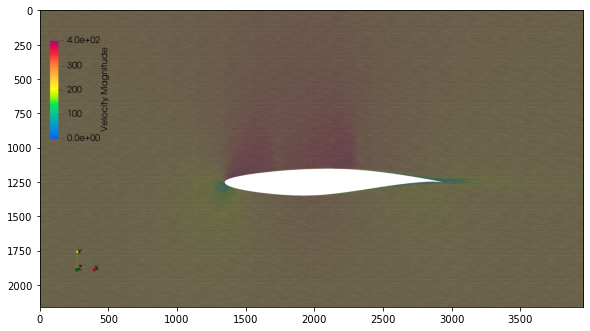

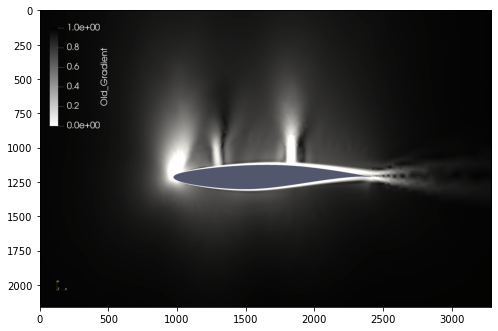

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax1=fig.add_subplot(2,1,2)
ax1.imshow(mpimg.imread('D:/SU2/Images/Velocity_Finaldesign_RAE2822_LIC.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax1=fig.add_subplot(2,1,2)
ax1.imshow(mpimg.imread('D:/SU2/Images/Density_Gradient_Finaldesign_RAE2822.png'))

As stated in [2], the velocity is not a built-in field in SU2, thus requiring the filter *Calculator* on Paraview. The density gradient has been non-dimensionalised and subsequently smoothed through an exponential function.

The post-processing comparisons can be carried out through the matlab script *surface_flow_plot.m* in *Script*. Besides, it is hereby recalled that the Continuous adjoint might produce different results if compared to Discrete approach, which is not possible on the platform the simulations have been run on (Windows), and this is the case. In fact, one should notice that the pressure coefficients are profusely different, again confirming the lack of robustness between the two approaches. Notwithstanding, the constraints are always respected and the solution might be considered acceptable.


# Bibliography 

In [2]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Turbulent_2D_Constrained_RAE2822/TXT_FILES/Bibliography.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()


[1] SU2's cite: https://su2code.github.io/tutorials/Turbulent_2D_Constrained_RAE2822/

[2] Schioppa, Aldo. "Adjoint Method in SU2", August 2022, Summer Internship, ISAE-SUPAERO, Jupyter Notebook.

[3] SU2's cite: https://su2code.github.io/tutorials/Unsteady_NACA0012/

